In [2]:
pip install nsepy

  Created wheel for nsepy: filename=nsepy-0.8-py3-none-any.whl size=36089 sha256=57e2972ce361ab7a9745b67d09cc558781369e2a41d148873e39b616fa1394b0
  Stored in directory: c:\users\vishesh\appdata\local\pip\cache\wheels\32\ab\d9\78ceea14cdf6de83376082b3cb0c2999fd77f823e35c47b9ec
Successfully built nsepy
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow

  Using cached tensorflow-2.7.0-cp37-cp37m-win_amd64.whl (430.8 MB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached termcolor-1.1.0.tar.gz (3.9 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached tensorboard-2.7.0-py3-none-any.whl (5.8 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard_plugin_wit-1.8.0-py3-none-any.whl (781 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached tensorboard_data_server-0.6.1-py3-none-any.whl (2.4 kB)
  Using cached cachetools-4.2.4-py3-none-any.whl (10 kB)
  Using cached pyasn1_modules-0.2.8-py2.py3-none-any.whl (155 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached pyasn1-0.4.8-py2.py3-none-any.whl (77 kB)
  Using cached oauthlib-3.1.1-py2.py3-none-any.whl (146 kB)
  Creat

ERROR: pytest-astropy 0.8.0 requires pytest-cov>=2.0, which is not installed.
ERROR: pytest-astropy 0.8.0 requires pytest-filter-subpackage>=0.1, which is not installed.


In [43]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


In [32]:
from nsepy import get_history as gh
import datetime as dt
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [33]:
#stk_data = pd.read_csv('BTC-USD.csv')
#df = pdd.DataReader('AAPL', data-source='yahoo', start = '2014-09-25', end = '2021-08-25')
stk_data = web.get_data_yahoo('BTC-USD', start = '2014-09-25', end = '2021-08-25')
stk_data

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-24,436.112000,421.131989,435.751007,423.204987,3.062770e+07,423.204987
2014-09-25,423.519989,409.467987,423.156006,411.574005,2.681440e+07,411.574005
2014-09-26,414.937988,400.009003,411.428986,404.424988,2.146080e+07,404.424988
2014-09-27,406.622986,397.372009,403.556000,399.519989,1.502930e+07,399.519989
2014-09-28,401.016998,374.332001,399.471008,377.181000,2.361330e+07,377.181000
...,...,...,...,...,...,...
2021-08-21,49717.019531,48312.199219,49327.074219,48905.492188,4.058521e+10,48905.492188
2021-08-22,49471.609375,48199.941406,48869.105469,49321.652344,2.537098e+10,49321.652344
2021-08-23,50482.078125,49074.605469,49291.675781,49546.148438,3.430505e+10,49546.148438


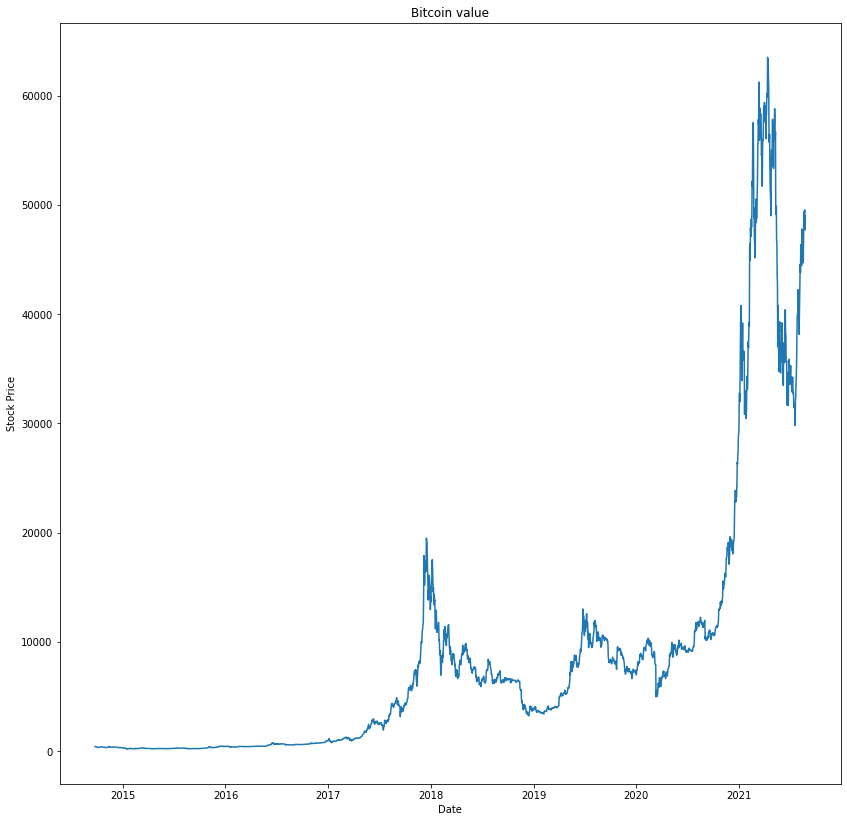

In [34]:
plt.figure(figsize=(14,14))
plt.plot(stk_data['Close'])
plt.title('Bitcoin value')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()

In [35]:
stk_data['Date'] = stk_data.index
data2 = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
data2['Date'] = stk_data['Date']
data2['Open'] = stk_data['Open']
data2['High'] = stk_data['High']
data2['Low'] = stk_data['Low']
data2['Close'] = stk_data['Close']

In [36]:
#normalization
train_set = data2.iloc[:, 1:2].values
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(train_set)
X_train = []
y_train = []
for i in range(60, 1482):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0]) 
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [37]:
#building LSTM model
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [42]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, y_train, epochs = 60, batch_size = 32)

Epoch 1/60
45/45 [==============================] - 11s 79ms/step - loss: 1.9847e-04
Epoch 2/60
45/45 [==============================] - 4s 80ms/step - loss: 2.0006e-04
Epoch 3/60
45/45 [==============================] - 4s 80ms/step - loss: 1.6680e-04
Epoch 4/60
45/45 [==============================] - 3s 74ms/step - loss: 1.4795e-04
Epoch 5/60
45/45 [==============================] - 3s 76ms/step - loss: 1.2509e-04
Epoch 6/60
45/45 [==============================] - 3s 75ms/step - loss: 1.5650e-04
Epoch 7/60
45/45 [==============================] - 4s 80ms/step - loss: 1.4842e-04
Epoch 8/60
45/45 [==============================] - 4s 85ms/step - loss: 1.8491e-04
Epoch 9/60
45/45 [==============================] - 4s 84ms/step - loss: 1.4036e-04
Epoch 10/60
45/45 [==============================] - 4s 83ms/step - loss: 1.7251e-04
Epoch 11/60
45/45 [==============================] - 4s 81ms/step - loss: 1.6783e-04
Epoch 12/60
45/45 [==============================] - 3s 78ms/step - loss:

In [43]:

testdataframe = web.get_data_yahoo('BTC-USD', start = '2020-01-25', end = '2021-08-25')
testdataframe['Date'] = testdataframe.index
testdata = pd.DataFrame(columns = ['Date', 'Open', 'High', 'Low', 'Close'])
testdata['Date'] = testdataframe['Date']
testdata['Open'] = testdataframe['Open']
testdata['High'] = testdataframe['High']
testdata['Low'] = testdataframe['Low']
testdata['Close'] = testdataframe['Close']
real_stock_price = testdata.iloc[:, 1:2].values
dataset_total = pd.concat((data2['Open'], testdata['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(testdata) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 635):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [44]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

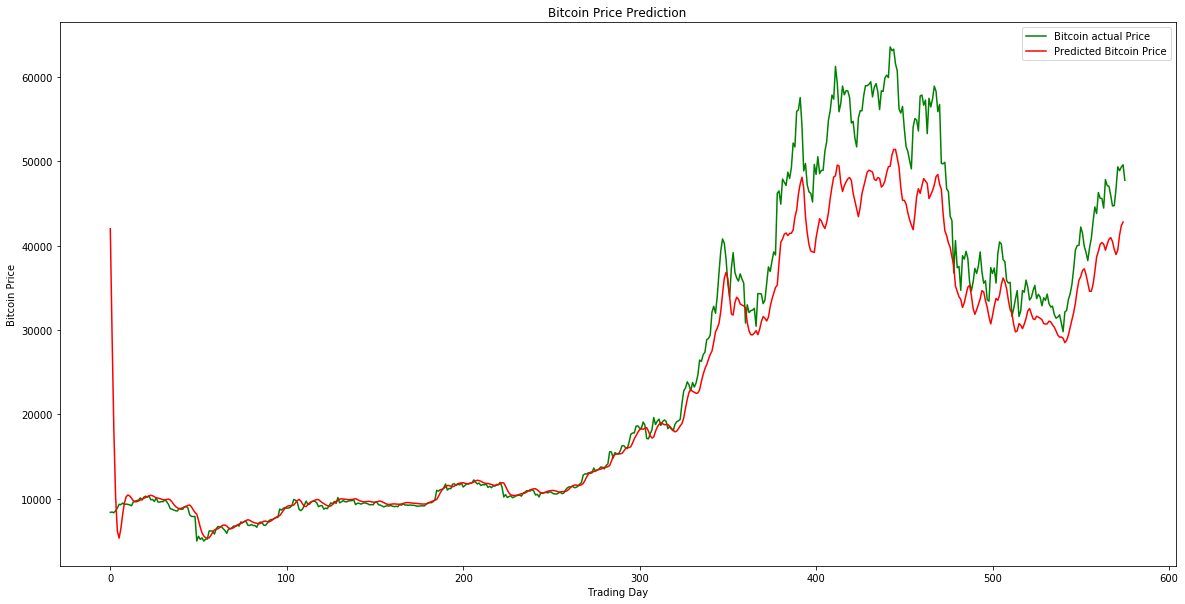

In [45]:
plt.figure(figsize=(20,10))
plt.plot(real_stock_price, color = 'green', label = 'Bitcoin actual Price')
plt.plot(predicted_stock_price, color = 'red', label = 'Predicted Bitcoin Price')
plt.title('Bitcoin Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Bitcoin Price')
plt.legend()
plt.show()